In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmasher 

In [2]:
class boundary_update():
    def __init__(self):
        pass
    
    def wall_boundary_x(v_tent):
        
        for i in range(63, 143, 64):
            #side walls
            v_tent[0:9,i] = 0 #-  v_tent[-9:,i-1]
            v_tent[0:9,i+14] = 0 #- v_tent[-9:,i+15]
            
            #top walls
            v_tent[9,i+1:i+14] = v_tent[10,i+1:i+14]
            
            
           # interior
            for j in range(0,9):
                v_tent[j,i+1:i+14] = 0
                
            
        return v_tent
    
    def wall_boundary_y(v_tent):
        
        for i in range(63, 143, 64):
            #side walls
            v_tent[0:9,i] = -  v_tent[0:9,i-1]
            v_tent[0:9,i+14] = - v_tent[0:9,i+15]
            
            #top walls
            v_tent[9,i+1:i+14] = - v_tent[10,i+1:i+14]
            
            
           # interior
            for j in range(0,9):
                v_tent[j,i+1:i+14] = 0
                
                
            
        return v_tent
    
    def wall_boundary_p(v_tent):
        
        for i in range(63, 143, 64):
            #side walls
            v_tent[0:9,i] =   v_tent[0:9,i-1]
            v_tent[0:9,i+14] =  v_tent[0:9,i+15]
            
            #top walls
            v_tent[9,i+1:i+14] =  v_tent[10,i+1:i+14]
            
            
           # interior
          #  for j in range(0,9):
           #     v_tent[j,i+1:i+14] = 0
                
                
            
        return v_tent
    
    def velocity_boundary_x(u_tent):
        
        inflow_mass_rate_tent = np.sum(u_tent[:, 0])
        outflow_mass_rate_tent = np.sum(u_tent[:, -2])
        
        
        
        u_tent[0, :] = 0 #top
        u_tent[:, 0] = 1.0 #left
        u_tent[:, -1] = u_tent[:, -2] 
        u_tent[-1, :] = 0
        
        u_tent = boundary_update.wall_boundary_x(u_tent)
        
        return u_tent
        
    def velocity_boundary_y(v_tent):
      
        
        v_tent[0, :] =  0.0 
        v_tent[:, 0] =  0.0
        v_tent[:, -1] = v_tent[:, -2]
        v_tent[-1, :] =   0.0
        
        v_tent = boundary_update.wall_boundary_y(v_tent)
        
        
        return v_tent
    
    def pressure_boundary(p_next):
        p_next[:, -1] =  0.0
        p_next[0,  :] = p_next[1,  :]
        p_next[:,  0] = p_next[:,  1]
        p_next[-1, :] =  p_next[-2, :]
        
        p_next = boundary_update.wall_boundary_p(p_next)
        
        return p_next
    
    def temperature_boundary(T_next):
        
        T_next[0, :] = 10 
        T_next[:, 0] = 0
        T_next[:, -1] = 0
        T_next[-1, :] = 0
        
        
        
        return T_next
        

In [3]:
u = np.ones([205,205])
u

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [6]:
u = boundary_update.velocity_boundary_x(u)

(-0.5, 204.5)

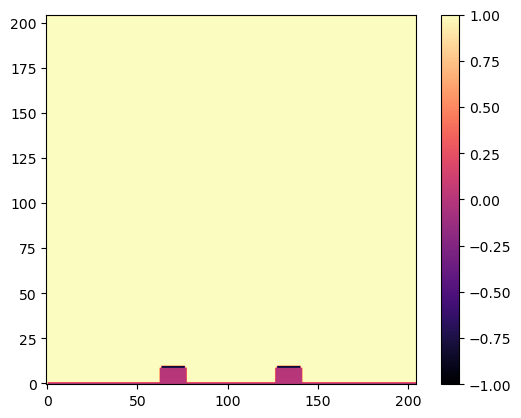

In [8]:
plt.imshow(u[:,:], cmap = 'magma')
plt.colorbar()
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

def wall_boundary(v_tent):
        
        for i in range(63, 143, 32):
            #side walls
            v_tent[-4:,i] += 125
            v_tent[-4:,i+3] += 125
            
            #top walls
            v_tent[-5,i:i+4] +=125
            
            #exterior of side walls
            v_tent[-4:,i-1] += 500
            v_tent[-4:,i+4] += 500

            #exterior of top  walls
            v_tent[-6,i:i+4] += 500
            
            #interior
            for j in range(-4,0):
                v_tent[j,i+1:i+3] += 250
    
        return v_tent